In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
df=pd.read_csv(r'D:\ML_Projects\analysis_notebooks\data\StudentsPerformance.csv')

In [53]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [54]:
df.shape

(1000, 8)

In [55]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
#extracting numerical and categorical features.

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if not df[feature].dtype == 'O']

print(f'The categorical features available in the data are : {cat_features}')
print(f"The numerical features availble in the data are : {numerical_features}")

The categorical features available in the data are : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
The numerical features availble in the data are : ['math score', 'reading score', 'writing score']


In [58]:
# printing stacked plots

def get_stacked(df,features,sup_title):
    col = 2
    row = len(features)//2 # jitne bhi cols honge , rows ko len of cat cols // number of cols karna hai apne ko.

    # creating a figure
    fig = plt.figure(figsize=(12,5*row))
    fig.suptitle(sup_title)

    for idx, feature in (features,1):
        axes=fig.add_subplot(row,col,idx)
        proportion = pd.crosstab(index=df[feature], columns=df[output],normalize='index')
        proportion.plot(kind='bar', stacked=True)
        axes.set_title(f"proportion of output lablet w.r.t {feature}")
# not using till i have an output feature.

In [59]:
def print_categoricals(df,cols):
    for col in cols:
        print(f"{col} : {df[col].unique()}")

In [60]:
print_categoricals(df,cat_features)

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


In [61]:
# adding total score and average score columns

df['total_score'] = df['math score']+df['writing score']+df['reading score']
df['avg_score'] = df['total_score']/3

In [62]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


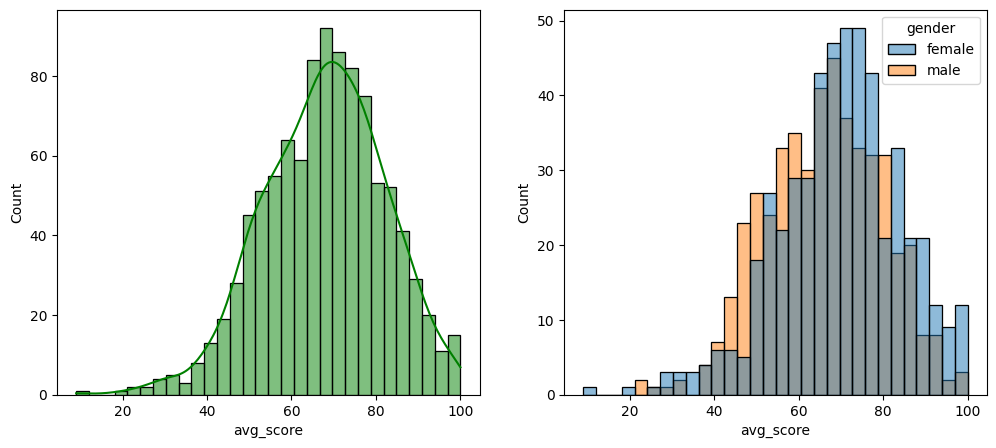

In [63]:
# doing further eda wrt average and total scores.
fig, axes = plt.subplots(1,2,figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', bins=30, color='g', kde=True)
plt.subplot(122)
sns.histplot(data=df,x='avg_score', hue='gender',bins=30)
plt.show()


<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


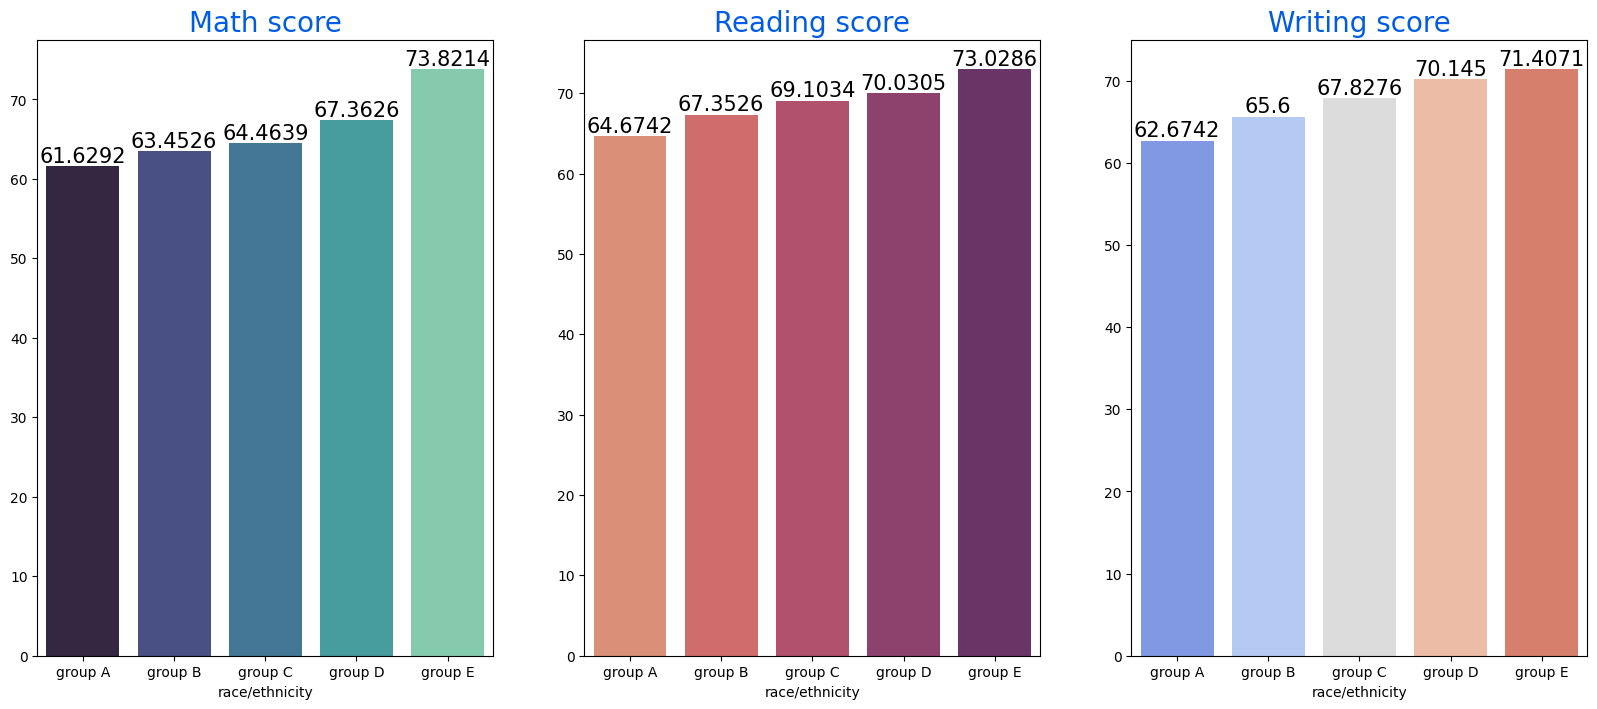

In [67]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

<Axes: ylabel='parental level of education'>

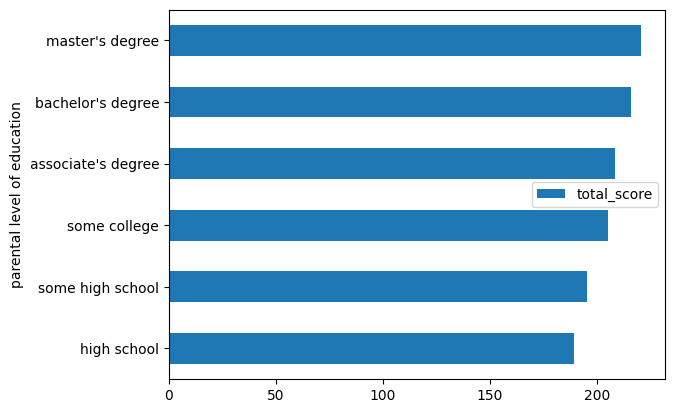

In [72]:
df.groupby('parental level of education').agg({'total_score':'mean'}).sort_values(by='total_score').plot(kind='barh')
#students whose parents have masters degree or the bachelors have higher average total score.

<Axes: xlabel='lunch', ylabel='count'>

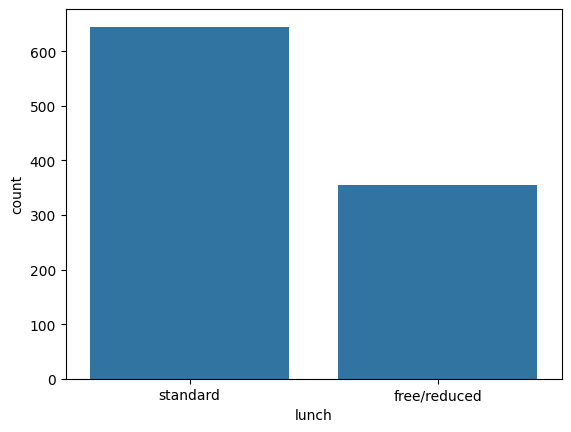

In [73]:
sns.countplot(data=df,x='lunch')

<Axes: ylabel='lunch'>

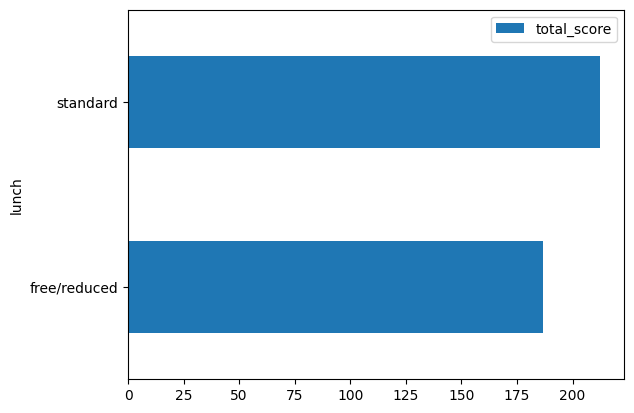

In [74]:
df.groupby('lunch').agg({'total_score':'mean'}).sort_values(by='total_score').plot(kind='barh')
#students who have standard lunch have higher avg total score compared to others.

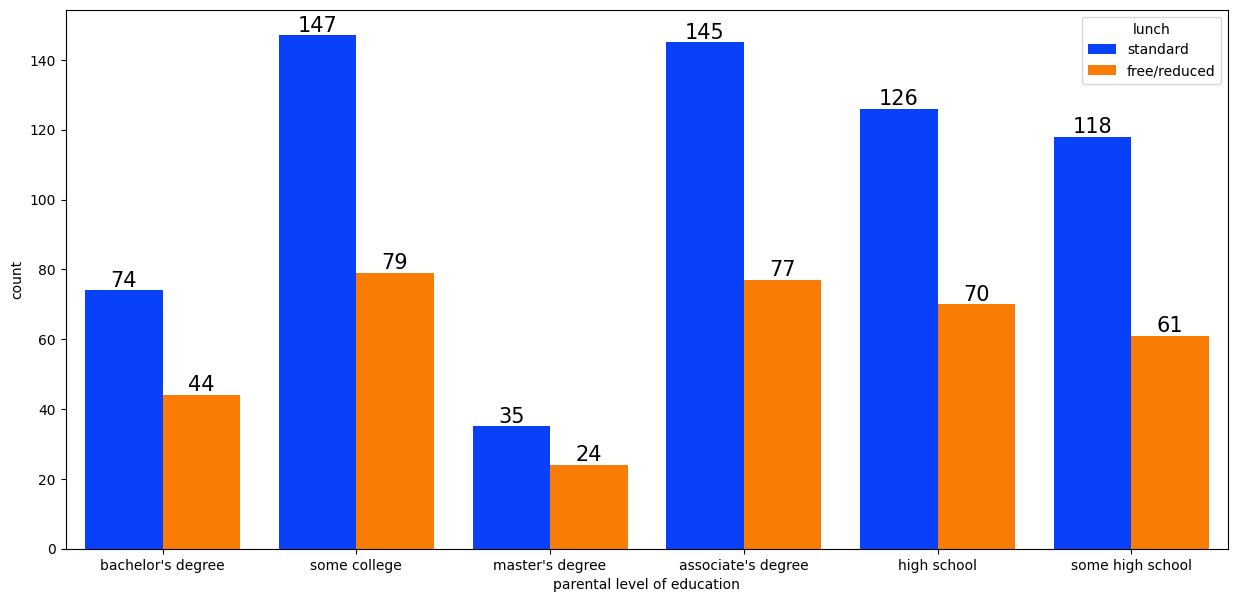

In [85]:
f,ax=plt.subplots(1,1,figsize=(15,7))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

<Axes: xlabel='lunch', ylabel='total_score'>

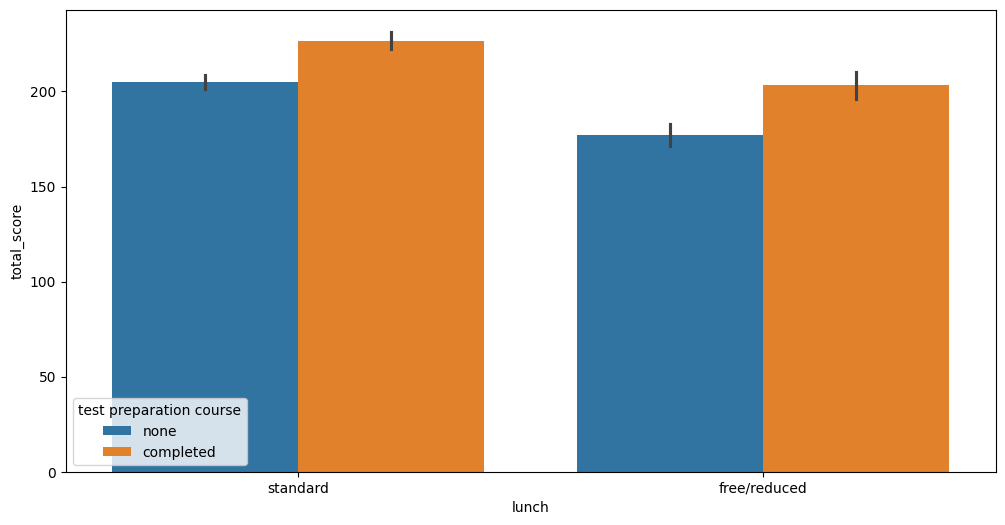

In [88]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
sns.barplot (x=df['lunch'], y=df['total_score'], hue=df['test preparation course'])
# plt.subplot(2,2,2)
# sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
# plt.subplot(2,2,3)
# sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

# no matter what the lunch type is students who have completed the course

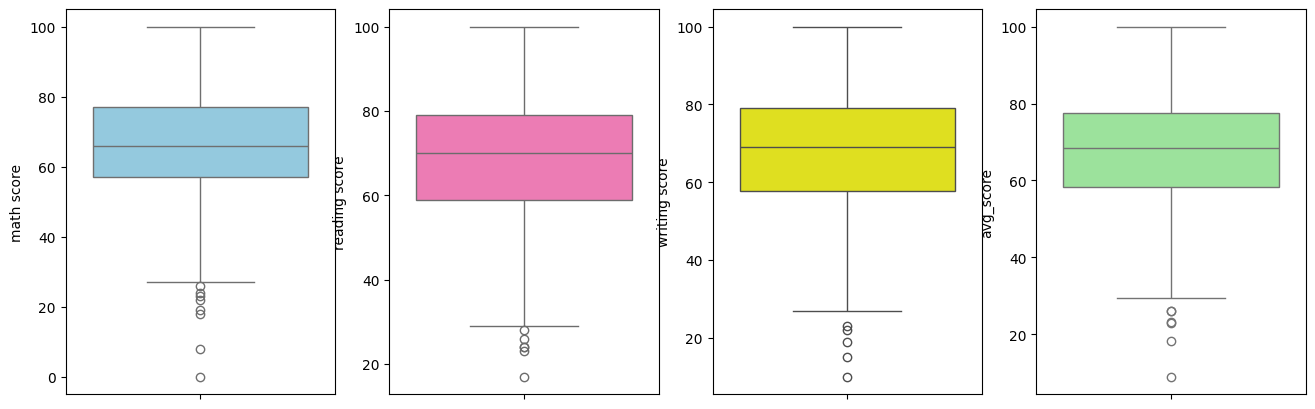

In [90]:
# checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()